<img src="../images/galvanize-logo.png" alt="galvanize-logo" align="center" style="width: 200px;"/>

<hr />

# Assignment - Storytelling

## The backstory


Let's imagine a fictional online education company called *Kalvanize*.  They have a team of talented data scientists and engineers that have been able to turn convert educational videos into dozens of other languages.  The video that a subscriber of this service clicks on is piped through cloud resources managed by Kalvanize and both the voice and the movement of the lips are modified to match the language the subscriber has selected.  The service even works for certain languages *on-demand*.  There are separate deep-learning models for the image and audio portions of the service, but the experience is seamless for the user.

Recently the management team has decided to expand its services to additional markets. The Singapore market demonstrated a strong initial adoption, with increasing revenue and traction from the subscribers in the first 4 months.  However, subscriptions & engagement have stagnated. The data shows that after about 4 months there is a major drop off in watch-time and subscribers are quickly dropping off the platform.

You are new to the data science team and management has tasked you with figuring this out.  There have been discussions about launching various marketing campaigns, modifying the pricing model, refining the product
and more, with the goal of driving the product growth in the new markets.  Ultimately the business opportunity here is to use these levers to improve engagement and sales. Inside the data there is a story to tell and your job is to pull it out.


## Part 1: data ingestion

The data team is busy so they did not have time to help much, but one of the team members cooked up a data ingestion script that was suppose to help you get started.  The user specific data you will need is stored in a data base and in another file there is some streaming data.  Have a look at the file `kalvanize-data-ingestor.py` and use it to get a staged csv file to begin your analysis.

In [1]:
## run the ingestor here

!python kalvanize-data-ingestor.py -d kalvanize-customers.db -s kalvanize-streams.csv

...successfully connected to db
... removed 7 duplicate rows in db data
... removed 1164 missing stream ids
done


{1: 'aavail_basic', 2: 'aavail_premium', 3: 'aavail_unlimited'}

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy import stats

## Part 2: EDA - summarize the data

You are going to want to spend a little time getting to know the data.  Are there any missing values? How much data and what what types of variables are you working with etc.  Remember to use visuals here.

In [3]:
## your code here
df_load = pd.read_csv("../data/kalvanize-staged.csv")
print("kalvanize-staged: {} x {}".format(df_load.shape[0],df_load.shape[1]))
print(df_load.columns.tolist())
print(df_load.dtypes)
print(df_load.info())
print(df_load.count().tail())
print(df_load.describe())
print(df_load.head(3))

kalvanize-staged: 32031 x 7
['customer_id', 'is_subscriber', 'country', 'age', 'customer_name', 'subscriber_type', 'num_streams']
customer_id        object
is_subscriber      object
country            object
age                object
customer_name      object
subscriber_type    object
num_streams        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32031 entries, 0 to 32030
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      32031 non-null  object
 1   is_subscriber    32031 non-null  object
 2   country          32031 non-null  object
 3   age              32031 non-null  object
 4   customer_name    32031 non-null  object
 5   subscriber_type  32031 non-null  object
 6   num_streams      32031 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB
None
country            32031
age                32031
customer_name      32031
subscriber_type    32031
num_streams     

In [4]:
df_load.head(3)

,customer_id,is_subscriber,country,age,customer_name,subscriber_type,num_streams
0,1,1,united_states,21,Kasen Todd,aavail_premium,23
1,2,0,singapore,31,Ensley Garza,aavail_unlimited,12
2,3,0,united_states,22,Lillian Carey,aavail_premium,22


In [5]:
#print(df_load.invoice_item_id.describe())
#print(df_load.subscription_stopped.describe())

In [6]:
# one user
df_one_user = df_load[df_load['customer_id'] == "1"]
df_one_user
                     

,customer_id,is_subscriber,country,age,customer_name,subscriber_type,num_streams
0,1,1,united_states,21,Kasen Todd,aavail_premium,23
1001,1,1,united_states,21,Kasen Todd,aavail_premium,23
2002,1,1,united_states,21,Kasen Todd,aavail_premium,23
3003,1,1,united_states,21,Kasen Todd,aavail_premium,23
4004,1,1,united_states,21,Kasen Todd,aavail_premium,23
5005,1,1,united_states,21,Kasen Todd,aavail_premium,23
6006,1,1,united_states,21,Kasen Todd,aavail_premium,23
7007,1,1,united_states,21,Kasen Todd,aavail_premium,23
8008,1,1,united_states,21,Kasen Todd,aavail_premium,23
9009,1,1,united_states,21,Kasen Todd,aavail_premium,23


In [7]:
df_streams = pd.read_csv("../data/kalvanize-streams.csv")
print("kalvanize-streams: {} x {}".format(df_streams.shape[0],df_streams.shape[1]))
print(df_streams.columns.tolist())
print(df_streams.dtypes)
df_streams.info()
df_streams.count().tail()

df_streams = df_streams[df_streams['stream_id'].notna()]
#check unique values of each column
df_streams.nunique()
#change type of date
df_streams['date'] = pd.to_datetime(df_streams['date'])

kalvanize-streams: 18859 x 5
['customer_id', 'stream_id', 'date', 'invoice_item_id', 'subscription_stopped']
customer_id               int64
stream_id               float64
date                     object
invoice_item_id         float64
subscription_stopped      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18859 entries, 0 to 18858
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           18859 non-null  int64  
 1   stream_id             17695 non-null  float64
 2   date                  18859 non-null  object 
 3   invoice_item_id       18859 non-null  float64
 4   subscription_stopped  18859 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 736.8+ KB


In [8]:
df_streams.head(10)


,customer_id,stream_id,date,invoice_item_id,subscription_stopped
0,1,1420.0,2018-10-21,2.0,0
1,1,1343.0,2018-10-23,2.0,0
2,1,1756.0,2018-11-05,2.0,0
3,1,1250.0,2018-11-06,2.0,0
4,1,1324.0,2018-11-12,2.0,0
5,1,1218.0,2018-11-12,2.0,0
6,1,1695.0,2018-11-23,2.0,0
7,1,1550.0,2018-11-25,2.0,0
9,1,1498.0,2018-12-12,2.0,0
10,1,1641.0,2018-12-14,2.0,0


## Part 3: EDA - Quality Assurance

Implementation of checks for Quality Assurance

1. Remove any repeat customers based on customer_id
2. Remove stream data that do not have an associated stream_id
3. Check for missing values

In the interest of time.  This stage has already been done for you in the data ingestion script.  It is still a good practice to have a couple of quality assurance checks present in your code.

In [9]:
## your code here
df_load.sort_values("customer_id", inplace = True) 
df = df_load.drop_duplicates(keep='first')
df = df[df.customer_id != 'customer_id']
df.info()
#using dictionary to convert specific columns 
convert_dict = {'customer_id': int, 
                'is_subscriber': int,
                'age': int,
                'num_streams': int
               } 
  
df = df.astype(convert_dict) 
print(df.dtypes) 
#Check for missing values
df.count().tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 19016
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1000 non-null   object
 1   is_subscriber    1000 non-null   object
 2   country          1000 non-null   object
 3   age              1000 non-null   object
 4   customer_name    1000 non-null   object
 5   subscriber_type  1000 non-null   object
 6   num_streams      1000 non-null   object
dtypes: object(7)
memory usage: 62.5+ KB
customer_id         int64
is_subscriber       int64
country            object
age                 int64
customer_name      object
subscriber_type    object
num_streams         int64
dtype: object


country            1000
age                1000
customer_name      1000
subscriber_type    1000
num_streams        1000
dtype: int64

pre-conclusion: no big difference between subscriber and non-subscriber in mean, median and std  

## Part 4: EDA - Tell the story


   >Goal: communicate EDA findings in an upcoming meeting with product managers and team leads.  
   You should be able to explain using visualizations what factor(s) are the likely 
   cause of the market situation in Singapore.

Recall that you are trying to identify the factors that contribute to the unique market situation in Singapore.  Singapore has a higher rate of churn than the other markets and there is something in the data that, once uncovered, will allow you to make a testable hypothesis.  

In practice your deliverable would have 

1. Descriptions of the data along with a summary of the business opportunity.  
2. The story details through the lens of an investigation  
3. Some discussion and suggestions about next steps in the process

In this part let's focus on the story details and the investigation.

HINT: You can use hypothesis testing and or visualization to figure out what is going on.  There is a difference between the two markets and there are several ways to tell the story.

In [10]:
non_sub=df[df['is_subscriber']==0]
non_sub.shape

(289, 7)

In [11]:
dfp=pd.pivot_table(df, index='country',columns='subscriber_type',values='customer_id',aggfunc=lambda x: len(x.unique()))
dfp1=dfp.div(dfp.sum(axis=1), axis=0).round(3)
dfp1

subscriber_type,aavail_basic,aavail_premium,aavail_unlimited
country,,,
singapore,0.400,0.280,0.320
united_states,0.353,0.353,0.294


In [12]:
## your investigative visuals
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline
def simple_plot():
    f,axes=plt.subplots(3,2,sharey=False,figsize=(20,20),dpi=100,facecolor='white')
    table1=pd.pivot_table(df, index='country',columns='is_subscriber',values='num_streams',aggfunc=np.median).plot(kind='bar',ax=axes[0,0])
    table2=pd.pivot_table(df, index='country',columns='is_subscriber',values='age',aggfunc=np.median).plot(kind='bar',ax=axes[0,1])
    table3=pd.pivot_table(df, index='country',columns='subscriber_type',values='num_streams',aggfunc=np.median).plot(kind='bar',ax=axes[1,0])
    table4=pd.pivot_table(df, index='country',columns='subscriber_type',values='age',aggfunc=np.median).plot(kind='bar',ax=axes[1,1])
#     table5=pd.pivot_table(df[df['is_subscriber']=='0'], index='subscriber_type',columns='country',values='num_streams',aggfunc=np.median).plot(kind='bar',ax=axes[2,0])
#     table6=pd.pivot_table(df[df['is_subscriber']=='0'], index='subscriber_type',columns='country',values='num_streams',aggfunc=np.mean).plot(kind='bar',ax=axes[2,1])
    dfp=pd.pivot_table(df, index='country',columns='subscriber_type',values='customer_id',aggfunc=lambda x: len(x.unique()))
    table5=dfp.div(dfp.sum(axis=1), axis=0).round(3).plot(kind='bar',ax=axes[2,1])
    

    axes[0,0].set_ylabel('the median num of streams')
    axes[0,1].set_ylabel('the median age')
    axes[1,0].set_ylabel('the median num of streams')
    axes[1,1].set_ylabel('the median age')
    axes[2,0].set_ylabel('the churn rate')
#     axes[2,1].set_ylabel('the mean num of streams')

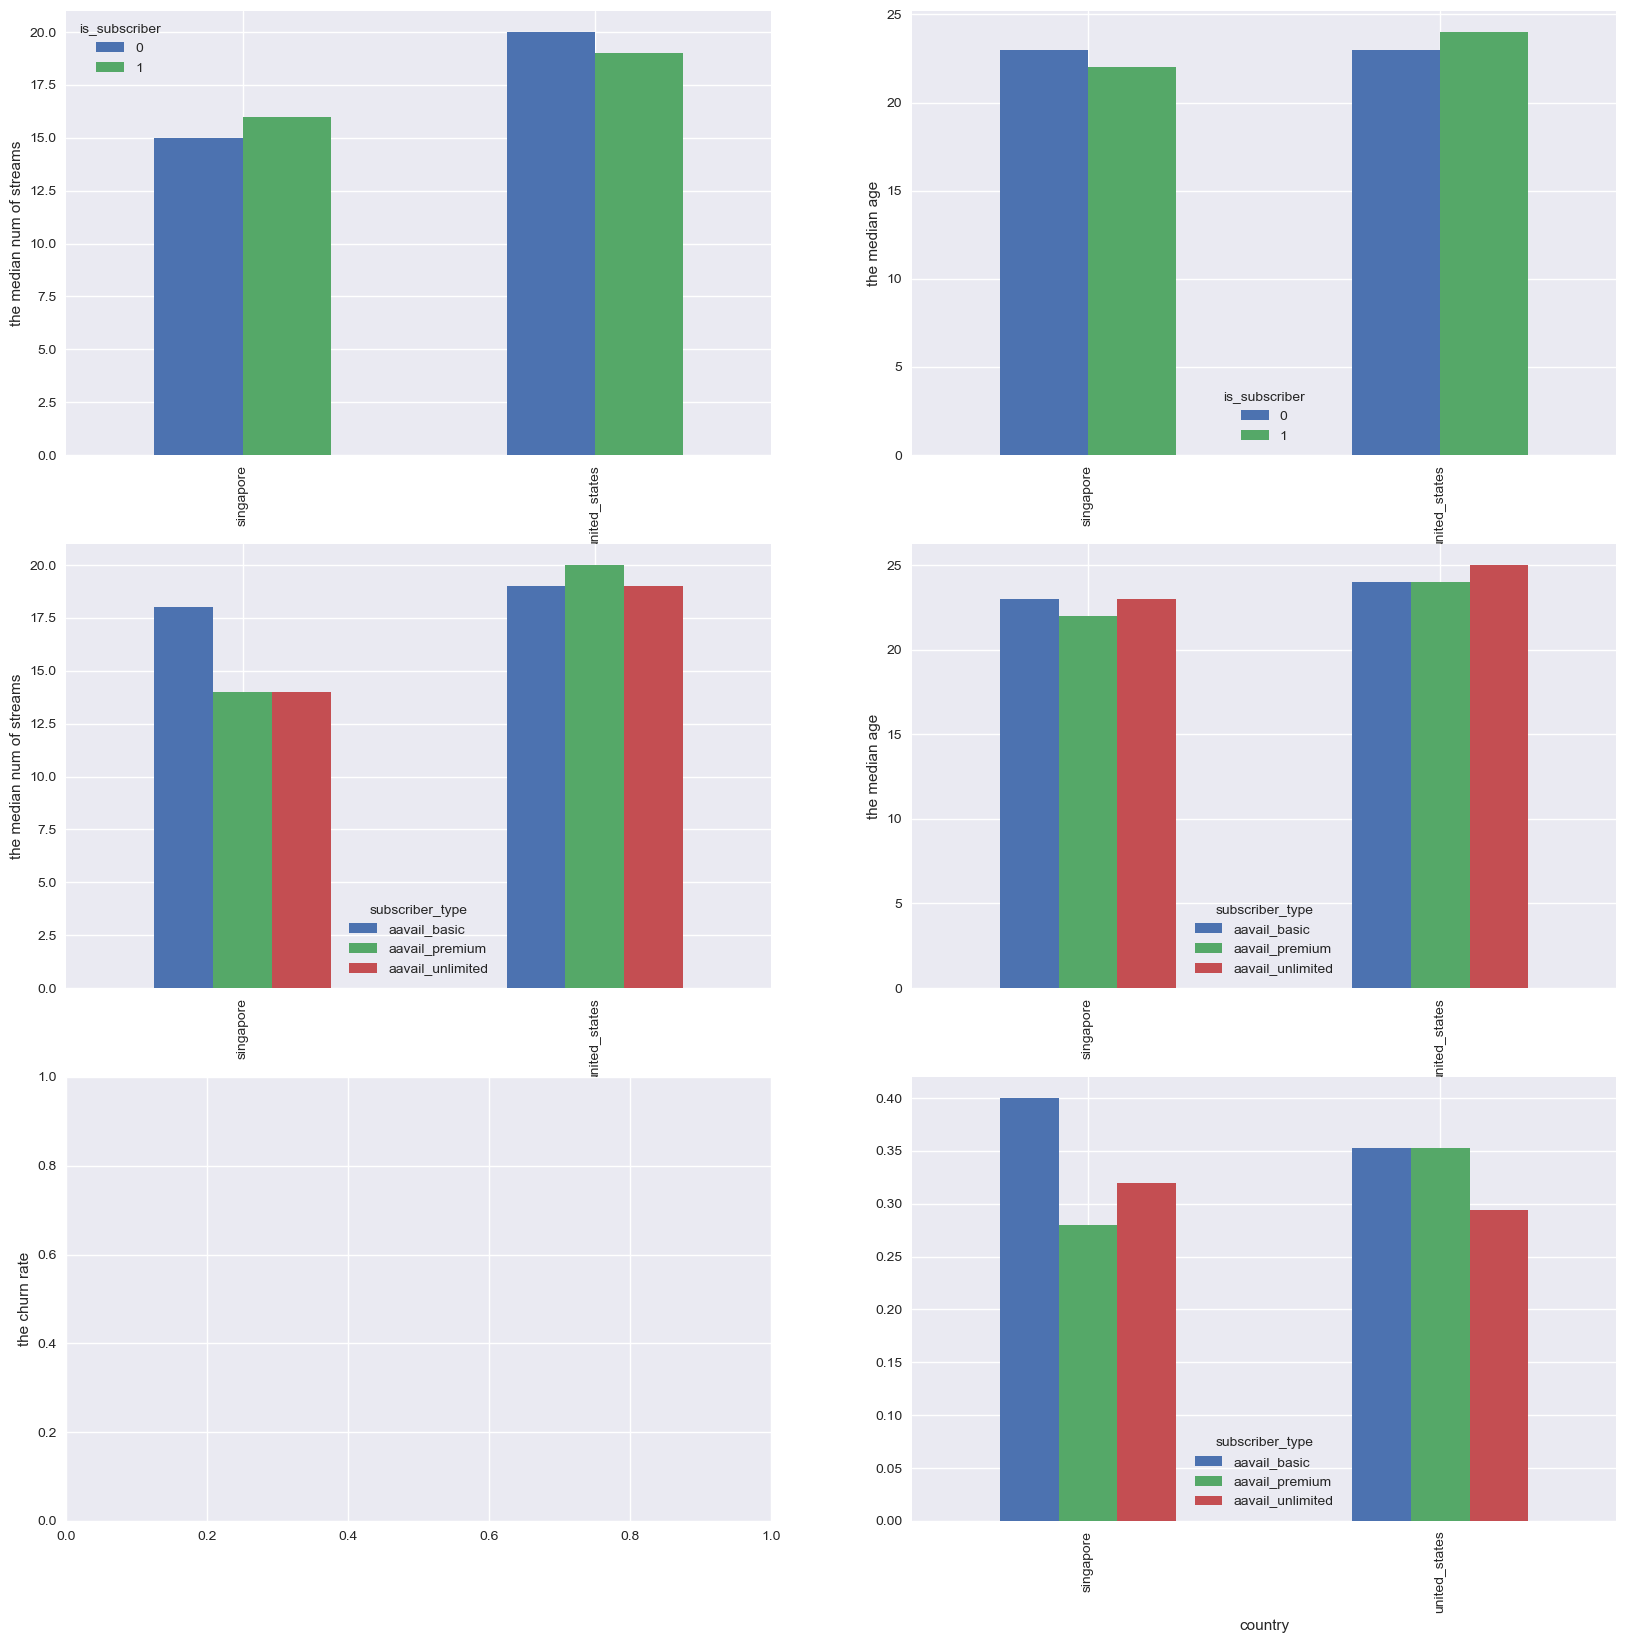

In [13]:
simple_plot()

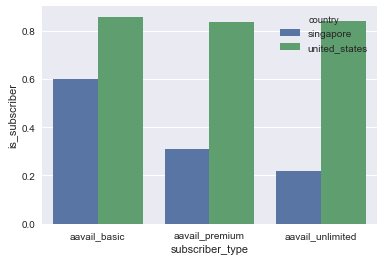

In [14]:
df1 = df[['subscriber_type', 'country', 'is_subscriber']].groupby(['subscriber_type', 'country'])['is_subscriber'].mean().reset_index()
sns.barplot(x="subscriber_type", y="is_subscriber", hue="country", data=df1)


Conclusion:  
The percentage of subscribers who are using basic plan in Singapore is 40%, which is higher than the premium subscribers and unlimited subscribers.  
The proportion of aabail basic subscriber in Singapore is higher than the proportion of aabail basic subscriber in US.    
And also the rotation rates of premium/ unlimited subscribers are too low. In general, the premium/ unlimited subscribers should have higher customer stickiness. In the next part, we might think about how to reduce the drop rate of premium/ unlimited subscribers in Singapore.  


## Extra Credit

Adopt the [plotly time-series tutorial](https://plotly.com/python/time-series/) to monitor the number of streams each day. 

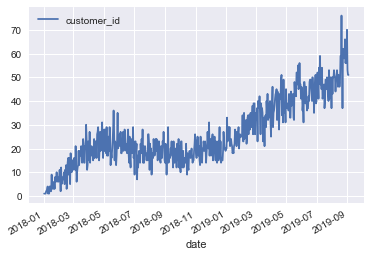

In [15]:
active_user = df_streams[df_streams['subscription_stopped']==0]
active_user.shape
dft = pd.pivot_table(active_user,index='date',values='customer_id',aggfunc=lambda x:len(x.unique()))
dft.plot(kind='line')

In [20]:
import plotly
#plotly.tools.set_credentials_file(username='tg550', api_key='l5H73sUEIRwxeg641vPv')
#import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

dft['date'] = dft.index
fig = px.line(dft, x='date', y='customer_id')
#fig.show()
plotly.offline.plot(fig, filename = 'plot')

'plot.html'

Plotly plot is in plot.html